In [1]:
#Importing essential libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
np.random.seed(90)
# 2. Number of samples
n_samples = 120
# 3. Generate synthetic features
Size = np.random.uniform(50, 300, n_samples) # e.g., 50m^2 to 300m^2
Num_Rooms = np.random.randint(1, 8, n_samples) # integer, 1 to 7 rooms
Location_Score = np.random.uniform(0, 10, n_samples) # 0 to 10 rating
# 4. Define a polynomial-like relationship for house price (target)
# Feel free to adjust coefficients, but do not change the "structure"
House_Price = (
                1000
                + 3.5 * Size
                + 800 * (Num_Rooms ** 2)
                - 50 * (Location_Score ** 2)
                + 100 * (Size * Location_Score)
                + np.random.normal(0, 2000, n_samples) # Noise
                )
# Combine into a DataFrame
df_real_estate = pd.DataFrame({
                                'Size': Size,
                                'Num_Rooms': Num_Rooms,
                                'Location_Score': Location_Score,
                                'House_Price': House_Price
                                })
# Inspect first few rows
print(df_real_estate.head())

         Size  Num_Rooms  Location_Score    House_Price
0   88.263550          6        0.444786   37582.871057
1   89.421415          3        2.630802   38520.984338
2  296.372779          4        5.783066  186971.195552
3  276.124433          3        7.691748  218255.800905
4   96.519566          4        8.262493   89615.200877


In [3]:
# Print all the records in the dataset
print(df_real_estate)

           Size  Num_Rooms  Location_Score    House_Price
0     88.263550          6        0.444786   37582.871057
1     89.421415          3        2.630802   38520.984338
2    296.372779          4        5.783066  186971.195552
3    276.124433          3        7.691748  218255.800905
4     96.519566          4        8.262493   89615.200877
..          ...        ...             ...            ...
115  169.308145          6        0.955961   47703.690477
116  187.161209          5        0.706673   36755.600456
117   54.975435          6        7.370442   69581.753836
118  167.394577          3        0.956529   26143.973854
119   97.373079          7        2.431064   67812.751409

[120 rows x 4 columns]


In [4]:
#       - 3 features are Size, Num_Rooms, Location_Score. Predecting House_Price 
#       - 120 samples and 3 features in the dataset.
print(f'Shape : {df_real_estate.shape}')

Shape : (120, 4)


In [5]:
print(df_real_estate.describe())

             Size   Num_Rooms  Location_Score    House_Price
count  120.000000  120.000000      120.000000     120.000000
mean   182.013972    3.975000        4.523353   97419.964352
std     70.615119    1.924903        3.040601   64690.031834
min     54.975435    1.000000        0.048658     314.290917
25%    120.987375    2.000000        1.610286   45924.912852
50%    187.172566    4.000000        4.235567   85251.017984
75%    238.763633    6.000000        7.276197  147366.368859
max    297.542451    7.000000        9.973899  258723.472803


In [6]:
correlations = df_real_estate.corr()
print(correlations)

                    Size  Num_Rooms  Location_Score  House_Price
Size            1.000000  -0.114496       -0.050172     0.448620
Num_Rooms      -0.114496   1.000000        0.082605     0.212450
Location_Score -0.050172   0.082605        1.000000     0.789686
House_Price     0.448620   0.212450        0.789686     1.000000


In [7]:
X = df_real_estate[['Size', 'Num_Rooms', 'Location_Score']]
Y = df_real_estate['House_Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=90)

In [8]:
print(f'Train Shape : {X_train.shape}') # 96 samples
print(f'Test Shape  : {X_test.shape}') # 24 samples

Train Shape : (96, 3)
Test Shape  : (24, 3)


In [9]:
linera_regression = LinearRegression()
linera_regression.fit(X_train, Y_train)

LinearRegression()

In [10]:
print(f'Intercepter     : {linera_regression.intercept_}')
print(f'Coefficients    : {dict(zip(X.columns, linera_regression.coef_))}')

# House_Price = -91774.01860882893 + 445.6808638007759 * Size + 7805.024091038828 * Num_Rooms + 17263.001390277863 * Location_Score
# For every additional 1 m^2 in Size, the House_Price is expected to increase by 445.6808638007759.

Intercepter     : -91774.01860882893
Coefficients    : {'Size': 445.6808638007759, 'Num_Rooms': 7805.024091038833, 'Location_Score': 17263.001390277856}


In [11]:
predict_house_price = linera_regression.predict(X_test)

In [12]:
mean_squared_error_result = mean_squared_error(Y_test, predict_house_price)
print(f'Mean Squared Error  : {mean_squared_error_result}')

Mean Squared Error  : 691513475.7421767


In [13]:
root_mean_squared_error_result = np.sqrt(mean_squared_error_result)
print(f'Root Mean Squared Error : {root_mean_squared_error_result}')

Root Mean Squared Error : 26296.643811372138


In [14]:
r2_score_result = r2_score(Y_test, predict_house_price)
print(f'R2 score    : {r2_score_result}')

R2 score    : 0.8185313454840256


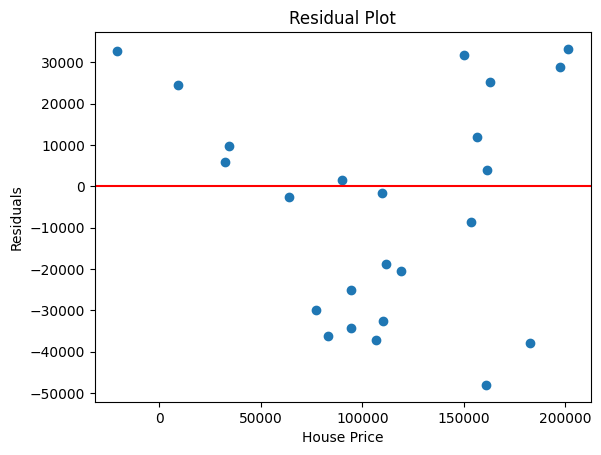

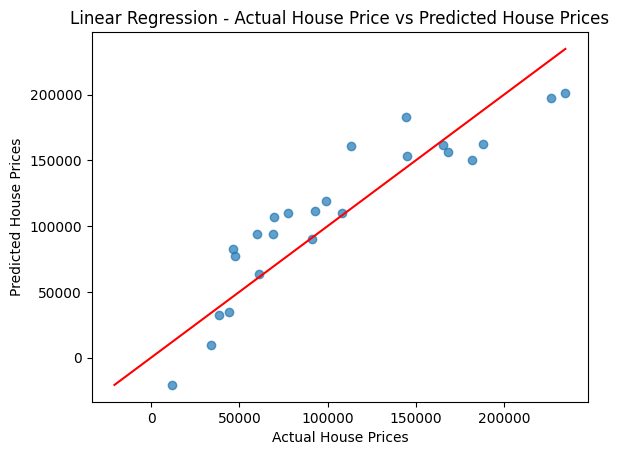

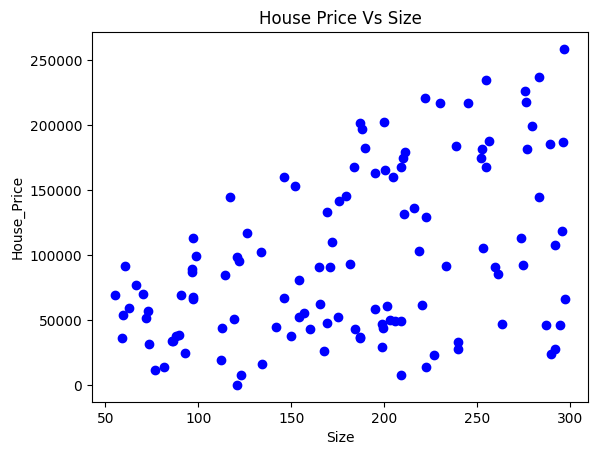

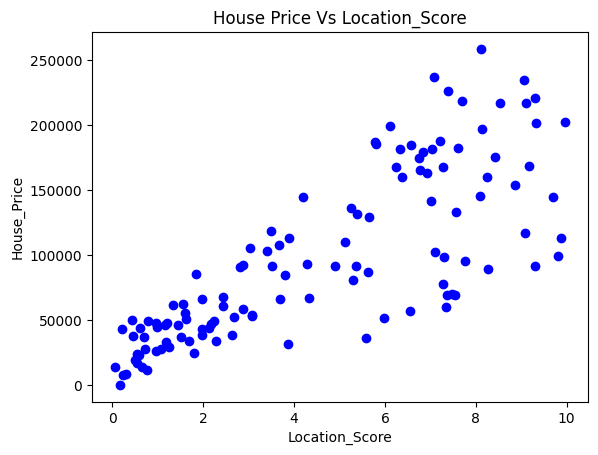

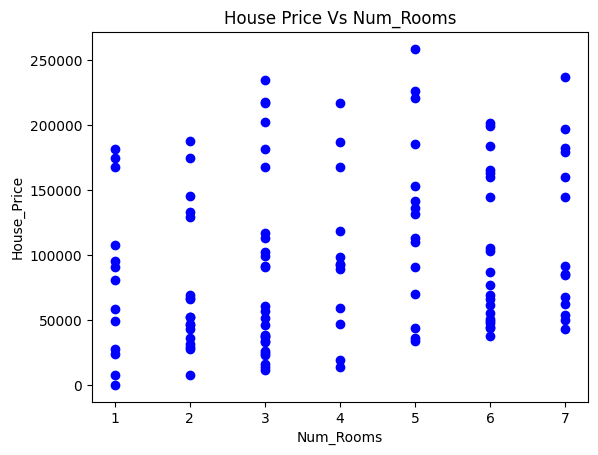

In [15]:
residuals = Y_test - predict_house_price

plt.figure()
plt.scatter(predict_house_price, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('House Price')
plt.ylabel('Residuals')
plt.show()

plt.scatter(Y_test, predict_house_price, alpha=0.7)
min_val = min(Y_test.min(), predict_house_price.min())
max_val = max(Y_test.max(), predict_house_price.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r-')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Linear Regression - Actual House Price vs Predicted House Prices")
plt.show()

plt.scatter(df_real_estate['Size'], df_real_estate['House_Price'], color='blue')
plt.title('House Price Vs Size')
plt.xlabel('Size')
plt.ylabel('House_Price')
plt.show()

plt.scatter(df_real_estate['Location_Score'], df_real_estate['House_Price'], color='blue')
plt.title('House Price Vs Location_Score')
plt.xlabel('Location_Score')
plt.ylabel('House_Price')
plt.show()

plt.scatter(df_real_estate['Num_Rooms'], df_real_estate['House_Price'], color='blue')
plt.title('House Price Vs Num_Rooms')
plt.xlabel('Num_Rooms')
plt.ylabel('House_Price')
plt.show()

In [16]:
polymonial_features = PolynomialFeatures(degree=2)
X_train_polymonial = polymonial_features.fit_transform(X_train)
X_test_polymonial = polymonial_features.fit_transform(X_test)

In [17]:
polymonial_regression = LinearRegression()
polymonial_regression.fit(X_train_polymonial, Y_train)

LinearRegression()

In [18]:
predict_house_price_polymonial = polymonial_regression.predict(X_test_polymonial)

mean_squared_error_polymonial_result = mean_squared_error(Y_test, predict_house_price_polymonial)
print(f'Mean Squared Error      : {mean_squared_error_polymonial_result}')

root_mean_squared_error_polymonial_result = np.sqrt(mean_squared_error_polymonial_result)
print(f'Root Mean Squared Error : {root_mean_squared_error_polymonial_result}')

r2_score_polymonial_result = r2_score(Y_test, predict_house_price_polymonial)
print(f'R2 score                : {r2_score_polymonial_result}')



Mean Squared Error      : 6074585.517357327
Root Mean Squared Error : 2464.6674253045435
R2 score                : 0.998405892438475


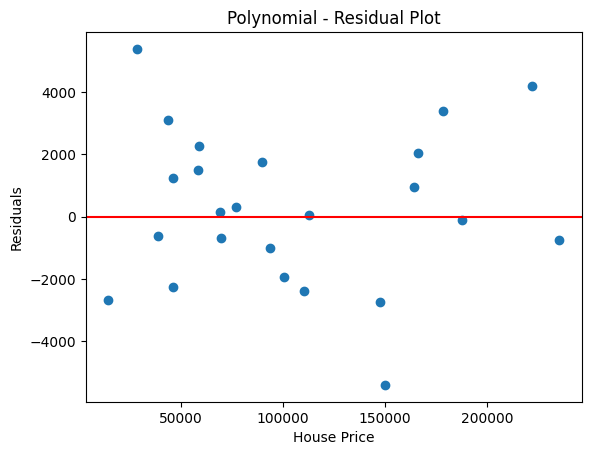

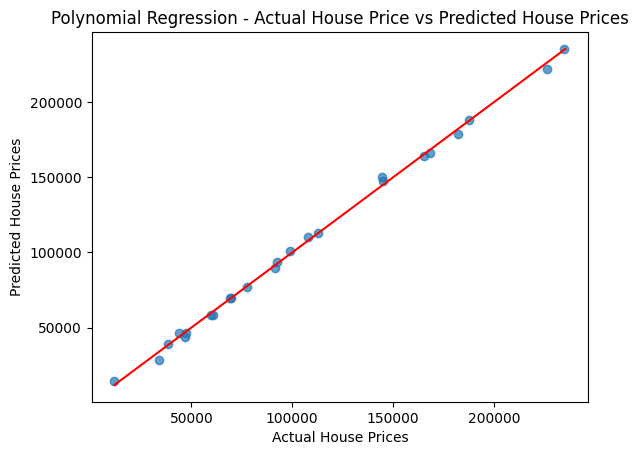

In [19]:
residuals = Y_test - predict_house_price_polymonial

plt.figure()
plt.scatter(predict_house_price_polymonial, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Polynomial - Residual Plot')
plt.xlabel('House Price')
plt.ylabel('Residuals')
plt.show()

plt.scatter(Y_test, predict_house_price_polymonial, alpha=0.7)
min_val = min(Y_test.min(), predict_house_price_polymonial.min())
max_val = max(Y_test.max(), predict_house_price_polymonial.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r-')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Polynomial Regression - Actual House Price vs Predicted House Prices")
plt.show()


In [20]:
for degree in range(2, 5):
    polymonial_features = PolynomialFeatures(degree=degree)
    X_train_polymonial = polymonial_features.fit_transform(X_train)
    X_test_polymonial = polymonial_features.fit_transform(X_test)

    polymonial_regression = LinearRegression()
    polymonial_regression.fit(X_train_polymonial, Y_train)

    predict_house_price_polymonial = polymonial_regression.predict(X_test_polymonial)

    mean_squared_error_polymonial_result = mean_squared_error(Y_test, predict_house_price_polymonial)
    root_mean_squared_error_polymonial_result = np.sqrt(mean_squared_error_polymonial_result)
    r2_score_polymonial_result = r2_score(Y_test, predict_house_price_polymonial)
    
    print(f'Degree                  : {degree}')
    print(f'Mean Squred Error       : {mean_squared_error_polymonial_result}')
    print(f'Root Mean Squred Error  : {root_mean_squared_error_polymonial_result}')
    print(f'R2 Score                : {r2_score_polymonial_result}')
    print('')

Degree                  : 2
Mean Squred Error       : 6074585.517357327
Root Mean Squred Error  : 2464.6674253045435
R2 Score                : 0.998405892438475

Degree                  : 3
Mean Squred Error       : 7894411.381117687
Root Mean Squred Error  : 2809.699517940964
R2 Score                : 0.9979283292925138

Degree                  : 4
Mean Squred Error       : 13081140.02914193
Root Mean Squred Error  : 3616.785869959947
R2 Score                : 0.9965672152981897



In [21]:
for degree in range(2, 7):
    polymonial_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_polymonial = polymonial_features.fit_transform(X_train)
    X_test_polymonial = polymonial_features.fit_transform(X_test)

    polymonial_regression = LinearRegression()
    polymonial_regression.fit(X_train_polymonial, Y_train)

    predict_house_price_polymonial_tune = polymonial_regression.predict(X_test_polymonial)

    mean_squared_error_polymonial_result = mean_squared_error(Y_test, predict_house_price_polymonial_tune)
    root_mean_squared_error_polymonial_result = np.sqrt(mean_squared_error_polymonial_result)
    r2_score_polymonial_result = r2_score(Y_test, predict_house_price_polymonial_tune)

    print(f'Degree                  : {degree}')
    print(f'Mean Squared Error      : {mean_squared_error_polymonial_result}')
    print(f'Root Mean Squared Error : {root_mean_squared_error_polymonial_result}')
    print(f'R2                      : {r2_score_polymonial_result}')
    print('')

Degree                  : 2
Mean Squared Error      : 6074585.517351282
Root Mean Squared Error : 2464.667425303317
R2                      : 0.9984058924384765

Degree                  : 3
Mean Squared Error      : 7894411.379621041
Root Mean Squared Error : 2809.6995176746286
R2                      : 0.9979283292929065

Degree                  : 4
Mean Squared Error      : 13081136.550144179
Root Mean Squared Error : 3616.7853890083356
R2                      : 0.9965672162111567

Degree                  : 5
Mean Squared Error      : 19568450.970352333
Root Mean Squared Error : 4423.624189547789
R2                      : 0.9948647993233387

Degree                  : 6
Mean Squared Error      : 31411995.1380514
Root Mean Squared Error : 5604.64050034
R2                      : 0.9917567875488665

